In [1]:
import numpy as np
import pandas as pd
import re

In [2]:

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/flats_cleaned.csv')

In [4]:
df.shape

(2872, 16)

In [5]:
df.sample(5)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
109,pareena laxmi apartments,0.32,sector 99a,6106.0,524.0,Super Built up area 524(48.68 sq.m.)Carpet area: 424.8 sq.ft. (39.47 sq.m.),2,2,2,not available,2,NaN,0 to 1 Year Old,"['Dwarka Expy', 'Govt. Sr. Sec. School', 'Excellere World School', 'Shani Mandir', 'PHC Garhi Harsaru', 'Alfaa Health Care Hospital', 'Corporation Bank', 'Axis Bank', 'KFG Sports Club', 'Basai Dhankot Railway Station', 'Grofers India Pvt. Ltd.', 'Rangmanch Farms', 'MCC Cricket Stadium', 'Indian Oil Petrol Pump', 'NSK Sports Academy']",[],"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel', 'Club house / Community Center', 'Rain Water Harvesting']"
1498,ss the leaf,2.10,sector 85,7467.0,2812.0,Super Built up area 2812(261.24 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2400 sq.ft. (222.97 sq.m.),4,4,3,"pooja room,study room,servant room",7,North,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2477,krisumi waterfall residences,2.30,sector 36a,15551.0,1479.0,Built Up area: 1479 (137.4 sq.m.),2,2,2,not available,23,NaN,undefined,"['Sector 54 Chowk Metro Station', 'Vatika Town Square-INXT', 'The Esplanade Mall', 'Dwarka Expy', 'Pataudi Road', 'Euro International School, Sector 84', 'DPG Degree Collge', 'Gurugram University', 'Aarvy Healthcare Super Speciality', 'Park Hospital', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction', 'DLF Corporate Greens', 'Holiday Inn Gurugram Sector 90']",NaN,NaN
302,maruti vihar,1.00,sector 28,9090.0,1100.0,Super Built up area 1100(102.19 sq.m.),1,1,1,"pooja room,study room",1,North,10+ Year Old,"['Mg road metro station', 'Iffco chowk metro station', 'Arya Samaj Mandir', 'Jain Bhawan', 'Axis bank ATM', 'Punjab national bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Icici bank ATM', 'Sidhesh Hospital Gurgaon', 'Lord Krishna Hospital', 'Privat Hospital', 'Umkal Hospital', 'Uma Sanjeevani Health Centre And Hospital', 'Sitaram Bhartia', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'DT Cinemas', 'PVR Metropolitan', 'PVR Cinames', 'PVR Cinames', 'DT Cinemas', 'Indusind bank', 'Abn amro bank', 'Lord krishna bank', 'Hdfc bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'Axis bank', 'Barbecue Grill', 'NutrioBox Gurugram', 'Pan Bangkok', 'Dighent cafe', 'Fat', 'Nowhere Brewpub and cafe', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Pizza Hut', 'Naveidyam', 'Food Court', 'American Montessori', 'Bahrisons library']","['6 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '8 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Club house / Community Center']"
2844,puri emerald bay,1.80,sector 104,8823.0,2040.0,Super 

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1194,1.60,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)
1722,1.02,2095.0,Super Built up area 2095(194.63 sq.m.)
2265,2.69,2152.0,Super Built up area 2150(199.74 sq.m.)
142,2.91,4343.0,Super Built up area 4350(404.13 sq.m.)Carpet area: 3480 sq.ft. (323.3 sq.m.)
2060,1.45,1800.0,Built Up area: 1800 (167.23 sq.m.)


In [7]:
df['areaWithType'].value_counts()

areaWithType
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.)                                                   17
Super Built up area 1578(146.6 sq.m.)                                                                                           17
Super Built up area 1350(125.42 sq.m.)                                                                                          15
Super Built up area 2010(186.74 sq.m.)                                                                                          14
Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.)                                                    14
Carpet area: 1650 (153.29 sq.m.)                                                                                                11
Super Built up area 2150(199.74 sq.m.)                                                                                          11
Super Built up area 1650(153.29 sq.m.)                                

In [8]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))

In [10]:
df['super_built_up_area'].value_counts().sort_index()

super_built_up_area
89.00        1
145.00       1
161.00       1
215.00       1
216.00       1
325.00       1
340.00       1
352.00       1
380.00       1
406.00       1
414.00       1
417.00       1
431.00       1
439.00       1
465.00       1
500.00       3
510.00       1
524.00       1
525.00       1
546.00       1
548.00       2
553.00       2
560.00       1
567.00       4
568.46       1
569.00       1
570.00       1
575.00       1
576.00       4
583.00       6
585.00       1
597.00       1
598.00       1
600.00       6
602.00       5
623.00       2
624.00       1
626.00       1
632.00       2
633.00       1
639.00       2
640.00       1
650.00       9
655.00       1
657.00       1
687.00       1
700.00       6
704.00       1
726.00       1
735.00       5
745.00       1
750.00       2
767.00       2
780.00       1
800.00       2
810.00       1
845.30       1
850.00       2
867.00       1
900.00       4
903.00       1
915.00       5
925.00       2
930.00       1
950.00       6
980.0

In [11]:
df['built_up_area'].value_counts().sort_index()

built_up_area
97.00         1
118.00        1
129.42        1
140.00        1
300.00        1
301.00        2
318.00        1
425.00        1
430.00        1
450.00        2
473.99        1
476.00        1
477.85        1
481.00        1
484.00        1
500.00        1
546.00        1
556.00        1
565.00        1
567.00        1
570.00        1
587.00        1
597.00        1
598.00        2
600.00        3
601.00        1
602.00        1
610.00        2
619.00        1
623.00        1
637.00        1
639.00        2
646.00        1
650.00        1
654.00        1
658.00        2
669.00        1
670.00        2
672.00        1
681.00        1
683.00        1
693.00        1
695.00        1
699.00        1
700.00        5
720.00        2
730.00        1
737.00        1
743.00        4
743.99        1
750.00        4
761.00        1
790.00        1
800.00        2
804.00        1
822.00        2
826.00        2
850.00        6
869.00        1
900.00        4
915.00        3
925.00    

In [12]:
df['carpet_area'].value_counts().sort_index()

carpet_area
66.00         1
72.00         1
76.44         3
77.31         1
77.53         1
84.01         1
86.00         2
92.00         2
92.44         1
100.00        1
107.70        1
108.40        2
124.00        1
127.30        1
180.00        1
200.00        1
246.00        1
250.00        1
301.00        1
301.28        1
302.00        1
320.00        1
321.60        1
324.00        1
336.96        1
339.00        1
340.09        1
350.00        2
357.00        1
360.00        1
361.88        1
366.08        3
366.48        2
380.00        1
380.44        1
392.00        1
394.00        2
399.00        1
400.00        1
402.00        1
405.00        1
410.00        2
412.00        1
424.80        1
425.00        1
435.00        1
443.32        1
448.00        2
450.00        7
453.50        1
457.52        1
457.81        1
460.00        1
461.77        1
465.00        1
467.00        2
468.00        2
470.00        1
471.00        1
480.00        1
480.53        3
481.00      

In [13]:
df['area'].value_counts().sort_index()

area
72.0         1
250.0        1
300.0        1
301.0        3
302.0        1
318.0        1
324.0        1
333.0        1
337.0        1
339.0        1
340.0        2
351.0        1
352.0        1
357.0        2
362.0        1
366.0        2
380.0        2
392.0        2
394.0        2
396.0        1
400.0        2
405.0        1
410.0        1
412.0        1
417.0        1
431.0        1
446.0        1
450.0        6
458.0        2
460.0        1
462.0        1
465.0        2
468.0        2
471.0        1
474.0        2
476.0        1
478.0        1
480.0        3
481.0        4
482.0        6
483.0        2
484.0        1
488.0        1
489.0        5
493.0        2
495.0        2
497.0        1
498.0        1
500.0        6
501.0        2
505.0        1
514.0        2
516.0        1
519.0        2
520.0        1
523.0        3
524.0        2
525.0        1
526.0        2
531.0        3
532.0        2
535.0        1
536.0        1
539.0        2
544.0        1
545.0        1
546.0

In [14]:
df[['price','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2179,0.75,1081.0,Built Up area: 1081 (100.43 sq.m.),NaN,1081.0,NaN
2353,1.16,1105.0,Super Built up area 1103(102.47 sq.m.),1103.0,NaN,NaN
700,0.28,489.0,Carpet area: 489 (45.43 sq.m.),NaN,NaN,489.0
2397,0.30,748.0,Built Up area: 743 (69.03 sq.m.)Carpet area: 621 sq.ft. (57.69 sq.m.),NaN,743.0,621.0
2038,2.00,1665.0,Super Built up area 1665(154.68 sq.m.),1665.0,NaN,NaN


In [15]:
df.duplicated().sum()


np.int64(0)

In [16]:
df.shape

(2872, 19)

In [17]:
# rows where any 1 of 3 (super built up, built up, carpet area) are empty
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 6)

In [18]:
# rows where all of 3 (super built up, built up, carpet area) are empty
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]
all_nan_df.shape

(0, 19)

2. Additional Room

In [19]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1230
servant room                                      612
study room                                        225
others                                            173
pooja room                                        131
study room,servant room                            79
store room                                         74
pooja room,servant room                            60
servant room,others                                47
servant room,pooja room                            30
pooja room,study room,servant room,others          25
study room,others                                  24
pooja room,study room,servant room                 22
servant room,store room                            18
pooja room,study room                              12
pooja room,study room,servant room,store room      12
servant room,study room                             8
study room,pooja room                               8
study room,se

In [20]:
df.insert(10, "extra_rooms", 0, True)

In [21]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,extra_rooms,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,maa bhagwati residency,0.45,sector 7,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,0,4,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0
1,apna enclave,0.50,sector 3,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,0,1,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,650.0
2,tulsiani easy in homes,0.40,sohna road,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,0,12,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', 'Ra

Comment: Will create a new column called "extra_rooms" from "additionalRoom" column

In [22]:
# extra rooms = total number of additional rooms
for i in df.index:
    # print(df["additionalRoom"][i])
    if df["additionalRoom"][i] == "not available":
        df.at[i, 'extra_rooms'] = 0
    else:
        df.at[i, 'extra_rooms'] = len(df["additionalRoom"][i].split(","))

In [23]:
df.sample(20)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,extra_rooms,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
1227,imperia the esfera,0.98,sector 37c,5399.0,1815.0,Super Built up area 1815(168.62 sq.m.)Carpet area: 1510 sq.ft. (140.28 sq.m.),3,4,3,"servant room,others",2,9,South-West,1 to 5 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade Mall', 'Sector 10 Market', 'Dwarka Expressway', 'Suncity School', 'Xavier’s International', 'Alpine School', 'Signature Hospital']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1815.0,NaN,1510.0
1605,unitech uniworld gardens,2.15,sector 47,10306.0,2086.0,Super Built up area 2086(193.8 sq.m.)Built Up area: 1950 sq.ft. (181.16 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.),3,4,3+,servant room,1,10,East,5 to 10 Year Old,"['Standard chartered ATM', 'Icici bank ATM', 'Park Hospital Gurgaon', 'Samvit Health Care', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Neelkanth Health Care', 'Vishesh Dental', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Meher Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Medanta', 'Bones Clinic - Orthopaedics', 'Skin Clinic', 'Divine Look Clinic Centre', 'Airforce Hospital', 'Dispencery', 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Haldiram', 'KFC', ""Domino's Pizza"", ""Nirula's"", 'India', 'Nook', 'Starbucks', 'Delhi Public School Primary Section', 'Kendriya Vidyalaya No.2 Sohna Road', 'Manav Rachna School', 'Kamla International', 'CR Model Public School', 'Amity Global School', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2086.0,1950.00,1750.0
633,ambience creacions,6.16,sector 22,20533.0,3000.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,"pooja room,servant room",2,10,South-East,0 to 1 Year Old,"['Moulsari Avenue', 'Ambience Mall', 'Old Delhi Gurgaon Road', 'Gurgaon - Delhi Expy', 'Rotary Public School', 'The NorthCap University', 'Manipal Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Candor Techspace', 'Hyatt Place Gurgaon Udyog Vihar', 'Fun N Food WaterPark', 'Hamoni Golf Camp', 'Tau DeviLal Sports Complex']","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Washing Machine', '6 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,3000.0
487,citizen apartment,3.55,sector 51,6826.0,5201.0,Built Up area: 5200 (483.1 sq.m.)Carpet area: 4700 sq.ft. (436.64 sq.m.),5,6,3+,"pooja room,study room,servant room,store room",4,11,North,5 to 10 Year Old,"['Radhakrishna Shani Mandir', 'Standard chartered ATM', 'Hdfc bank ATM', 'Hdfc ATM', 'Standard chartered ATM', 'Axis bank ATM', 'State bank ATM', 'Icici bank ATM', 'State bank of india ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'Meher Clinic', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'Arihant Hospital', 'Bones Clinic - Orthopaedics', 'Sukhmani Hospital Pvt. Ltd', 'Dispencery', 'Park Hospital Gurgaon', 'Vishesh Dental', 'Neelkanth Health Care', 'Wembley estate club', 'Perno

In [24]:
df['agePossession'].value_counts().sort_index()

agePossession
0 to 1 Year Old        414
1 to 5 Year Old       1448
10+ Year Old           130
5 to 10 Year Old       348
Apr 2024                 1
Apr 2026                 2
Aug 2023                 6
Aug 2024                 5
Aug 2025                 2
Aug 2026                 1
By 2023                 17
By 2024                 15
By 2025                  4
By 2027                  1
Dec 2023                18
Dec 2024                14
Dec 2025                 7
Dec 2026                 2
Feb 2024                 3
Jan 2024                 6
Jan 2025                 4
Jan 2026                 2
Jan 2027                 1
Jan 2028                 1
Jul 2024                 3
Jul 2025                 2
Jul 2026                 1
Jul 2027                 2
Jun 2024                 5
Jun 2025                 1
Jun 2027                 2
Mar 2024                12
Mar 2025                 2
Mar 2026                 1
May 2024                 3
Nov 2023                 5
Nov 2024      

In [25]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [26]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [27]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,extra_rooms,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,maa bhagwati residency,0.45,sector 7,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,0,4,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0
1,apna enclave,0.50,sector 3,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,0,1,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,650.0
2,tulsiani easy in homes,0.40,sohna road,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,0,12,NaN,New Property,"['Huda City Metro', 'Golf Course extn road', 'Rajiv 

In [28]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1498,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2845,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
348,NaN,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
1364,"['1 Exhaust Fan', '4 Geyser', '9 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
2527,"['7 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '51 Light', '1 Modular Kitchen', '6 AC', '1 Chimney', '4 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No Stove', 'No TV', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [29]:
# Extract all unique furnishings from the furnishDetails column and create a separate dataframe for furnishing
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [30]:
furnishings_df.shape

(2872, 20)

In [31]:
furnishings_df.head()

,furnishDetails,Geyser,Sofa,Light,Curtains,Fridge,AC,Water Purifier,Chimney,Bed,Stove,Modular Kitchen,TV,Microwave,Wardrobe,Washing Machine,Dining Table,Club house,Fan,Exhaust Fan
0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0
1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1,0,3,1,0,0,0,1,0,0,1,0,0,3,0,0,0,4,1
2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)
furnishings_df.head()

/tmp/ipykernel_5848/1134485656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


,Geyser,Sofa,Light,Curtains,Fridge,AC,Water Purifier,Chimney,Bed,Stove,Modular Kitchen,TV,Microwave,Wardrobe,Washing Machine,Dining Table,Club house,Fan,Exhaust Fan
0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0
1,1,0,3,1,0,0,0,1,0,0,1,0,0,3,0,0,0,4,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

Comment: planning to divide furnishing details into 3 categories -> semifurnished, furnished, unfurnished

In [35]:
wcss_reduced = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

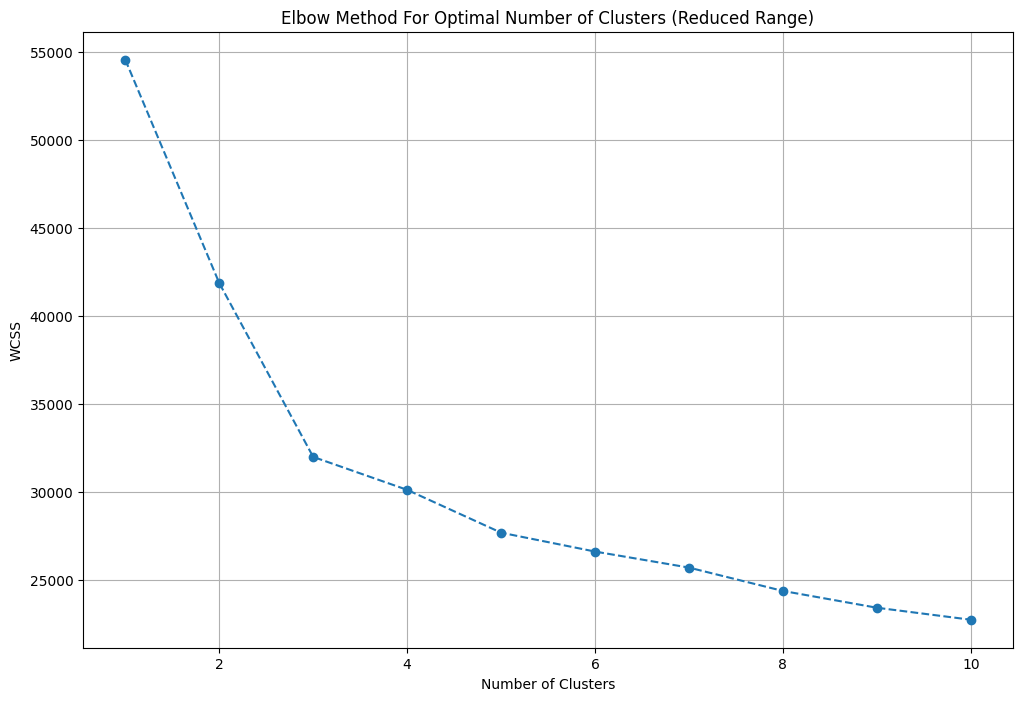

In [36]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Comment: Also the model is saying 3 clusters -> semifurnished, furnished, unfurnished

In [37]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [38]:
cluster_assignments

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

In [39]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'extra_rooms',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'Geyser', 'Sofa', 'Light', 'Curtains', 'Fridge', 'AC',
       'Water Purifier', 'Chimney', 'Bed', 'Stove', 'Modular Kitchen', 'TV',
       'Microwave', 'Wardrobe', 'Washing Machine', 'Dining Table',
       'Club house', 'Fan', 'Exhaust Fan'],
      dtype='object')

In [40]:
# remove unnecessary columns -> 'Washing Machine', 'Stove', 'Fan', 'Fridge', 'Geyser', 'Curtains', 'Club house', 'Bed', 'Wardrobe', 'Water Purifier', 'AC', 'TV', 'Microwave', 'Sofa', 'Exhaust Fan', 'furnishing_type'
df = df.iloc[:,:-19]

In [41]:
df['furnishing_type'] = cluster_assignments

In [42]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
900,NaN,0
1738,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
422,NaN,0
22,[],0
168,"['2 Wardrobe', '1 Exhaust Fan', '2 Geyser', '4 Light', '3 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2


In [43]:
df.shape

(2872, 21)

In [44]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'extra_rooms',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'furnishing_type'],
      dtype='object')

5.features

In [45]:
df[['society','features']].sample(5)

,society,features
1996,sare crescent parc,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2805,imperia the esfera,"['Intercom Facility', 'Lift(s)', 'Feng Shui / Vaastu Compliant', 'Swimming Pool', 'Park', 'Security Personnel', 'Maintenance Staff', 'Club house / Community Center', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Water softening plant']"
1787,paras dews,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1717,dlf regal gardens,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2281,ramprastha skyz,"['Lift(s)', 'Piped-gas', 'Internet/wi-fi connectivity', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Security Personnel', 'Fitness Centre / GYM']"


In [46]:
df['features'].isnull().sum()

np.int64(368)

Comment: Reading another csv file to fill 'features' ciolumn of df where null

In [47]:
# Reading another csv file to fill 'features' ciolumn of df where null
import pandas as pd
app_df = pd.read_csv('../data/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [48]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df = df[df['features'].isnull()]
temp_df.shape

(368, 21)

In [49]:
# Finding out the rows where feature = null
temp_df = df[df['features'].isnull()]

In [50]:
# Merging two dfs by 'left merge' to fill out missing values
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [51]:
x

0                                                                                                                                                                                   NaN
1                                                                                                                                                                                   NaN
2                                                                                                                                                                                   NaN
3                                                                                                                                                                                   NaN
4                                                                                                                                                                                   NaN
5                                          ['Swimming Pool', 'Volley Ball Court'

In [52]:
# Filling out missing values
df.loc[temp_df.index,'features'] = x.values

In [53]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,extra_rooms,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,furnishing_type
0,maa bhagwati residency,0.45,sector 7,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,0,4,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0,0
1,apna enclave,0.50,sector 3,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,0,1,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,650.0,2
2,tulsiani easy in homes,0.40,sohna road,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,0,12,NaN,New Property,"['Huda City Metro', 'Golf Course

In [54]:
df['features'].isnull().sum()

np.int64(238)

Comment: Deciding a luxury score instead of facility string

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
405,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [56]:
features_binary_df.shape

(2872, 128)

In [57]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [58]:
luxury_score

0        28
1        37
2        36
3        76
4         0
5         0
6         0
7        60
8        58
9       100
10       49
11       44
12        0
13        0
14       15
15       59
16        0
17       49
18      104
19       49
20       38
21       49
22       45
23       95
24       72
25        0
26       34
27       49
28       42
29       60
30        0
31      119
32       14
33        0
34       60
35       72
36       83
37      109
38      103
39       15
40       67
41       49
42      130
43        0
44       46
45      102
46       97
47      110
48       72
49       38
50       52
51       49
52       16
53       46
54       44
55        9
56       22
57       37
58        0
59        0
60       80
61       37
62       97
63      109
64       62
65       51
66       55
67       60
68       50
69        0
70       49
71       37
72       43
73       90
74       44
75       42
76      111
77        0
78       95
79       75
80       61
81       15
82      105
83  

In [59]:
df['luxury_score'] = luxury_score

In [60]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,extra_rooms,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,furnishing_type,features_list,luxury_score
0,maa bhagwati residency,0.45,sector 7,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,0,4,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Lift(s), Water Storage, Visitor Parking]",28
1,apna enclave,0.50,sector 3,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,0,1,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,650.0,2,"[Security / Fire Alarm, Maintena

In [61]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'extra_rooms',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'furnishing_type', 'features_list', 'luxury_score'],
      dtype='object')

In [62]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [63]:
df.columns

Index(['society', 'price', 'sector', 'price_per_sqft', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'extra_rooms', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [64]:
df.shape

(2872, 18)

In [65]:
df.sample(5)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,extra_rooms,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,furnishing_type,luxury_score
1940,sidhartha ncr one,0.57,sector 95,4179.0,1364.0,Built Up area: 1364 (126.72 sq.m.)Carpet area: 1232 sq.ft. (114.46 sq.m.),2,2,2,0,10,NaN,Undefined,NaN,1364.0,1232.00,0,0
747,la vida by tata housing,3.35,sector 113,12444.0,2692.0,Carpet area: 2692 (250.09 sq.m.),4,4,3+,2,11,North-East,Relatively New,NaN,NaN,2692.00,2,174
820,emaar palm gardens,1.72,sector 83,9052.0,1900.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1240.04 sq.ft. (115.2 sq.m.),3,3,3,1,4,South,Relatively New,1900.0,1600.0,1240.04,2,165
1242,vatika city,1.72,sector 49,7818.0,2200.0,Carpet area: 2200 (204.39 sq.m.),3,3,2,0,2,North-East,Old Property,NaN,NaN,2200.00,2,144
2712,umang monsoon breeze,1.10,sector 78,5055.0,2176.0,Built Up area: 2176 (202.16 sq.m.),3,3,3+,1,9,NaN,Old Property,NaN,2176.0,NaN,0,80


In [66]:
df.to_csv('../data/flats_feature_engg.csv',index=False)